<a href="https://colab.research.google.com/github/dravichi/Data-Analytics/blob/main/Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salaries**

---



**Import Essential Libraries**

In [1]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Import Dataset**

In [2]:
files.upload()
df = pd.read_csv('ds_salaries new.csv')

Saving ds_salaries new.csv to ds_salaries new.csv


**Data Overview**

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [3]:
df.describe(include=object).T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


**Data Preprocessing**

In [6]:
df['work_year']= df['work_year'].astype('category')
df.drop(columns=['salary', 'salary_currency'], inplace=True)

**EDA**

Text(0.5, 1.0, 'Relation Between Numerical Variables')

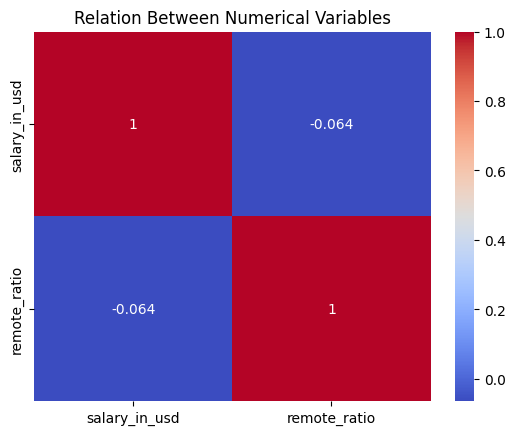

In [8]:
numerical = df.select_dtypes(include=['int64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm').set_title('Relation Between Numerical Variables')

Text(0.5, 1.0, 'Remote Ratio according to Company Size')

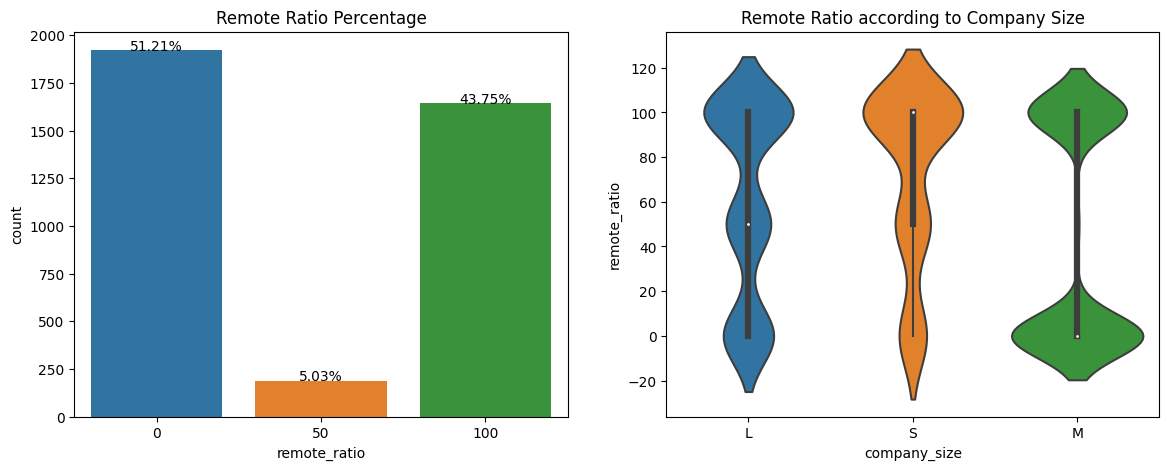

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
def percentageX(ax):
  for p in ax.patches:
      height = p.get_height()
      x = p.get_x()+p.get_width()/2
      y = height
      ax.text(x, y, f'{round(height/len(df)*100, 2)}%', ha="center")

plot_remote = sns.countplot(df, ax=axes[0], x='remote_ratio')
percentageX(plot_remote)
plot_remote.set_title('Remote Ratio Percentage')
sns.violinplot(df, ax=axes[1], x='company_size', y='remote_ratio').set_title('Remote Ratio according to Company Size')

Text(0.5, 1.0, 'Growth of Salaries in Year based on Company Size')

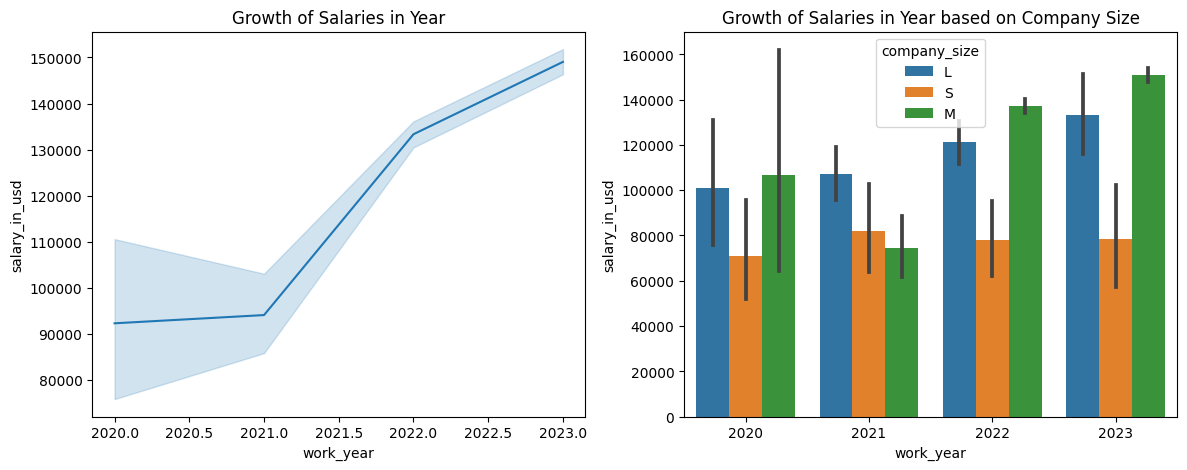

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.lineplot(df, ax=axes[0], x=df['work_year'], y='salary_in_usd', estimator='mean').set_title('Growth of Salaries in Year')
sns.barplot(df, ax=axes[1], x='work_year', y='salary_in_usd', estimator='mean', hue='company_size').set_title('Growth of Salaries in Year based on Company Size')

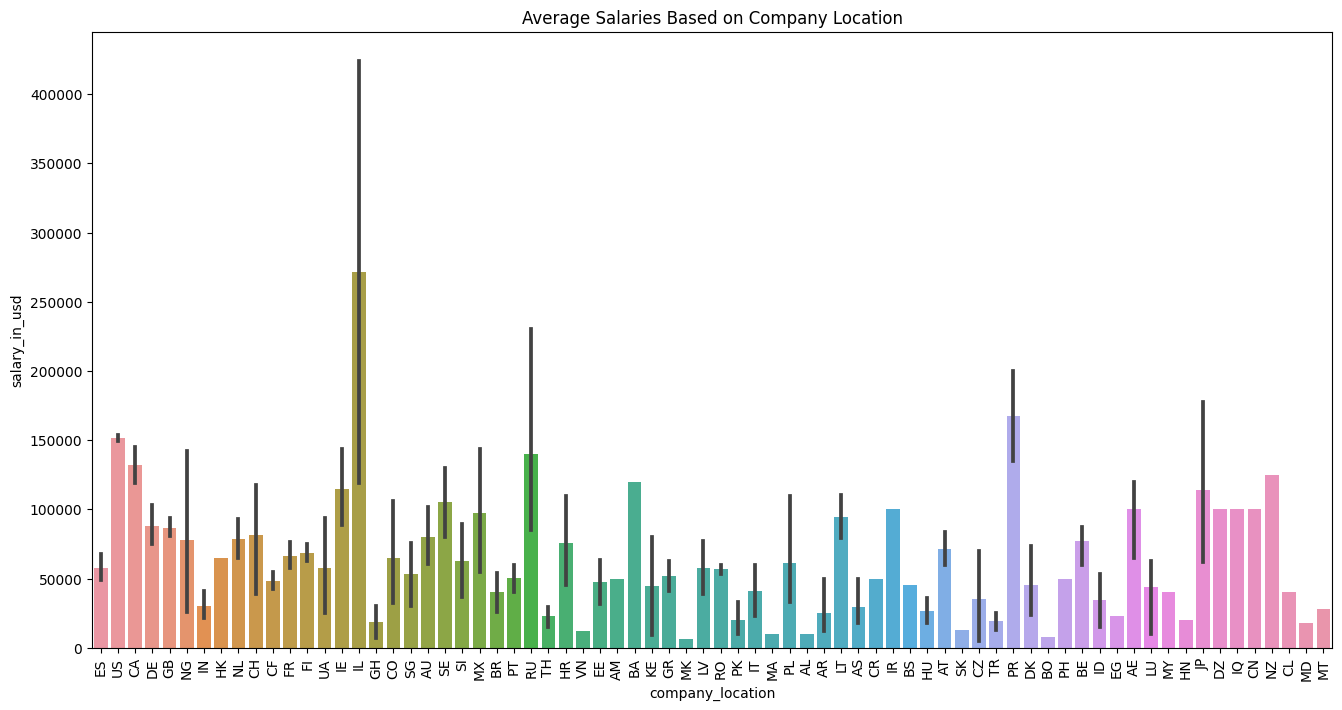

In [11]:
plt.figure(figsize=(16, 8))
snsplot = sns.barplot(df, x='company_location', y='salary_in_usd', estimator='mean')
snsplot.set_title('Average Salaries Based on Company Location')
snsplot.tick_params(axis='x', rotation=90)

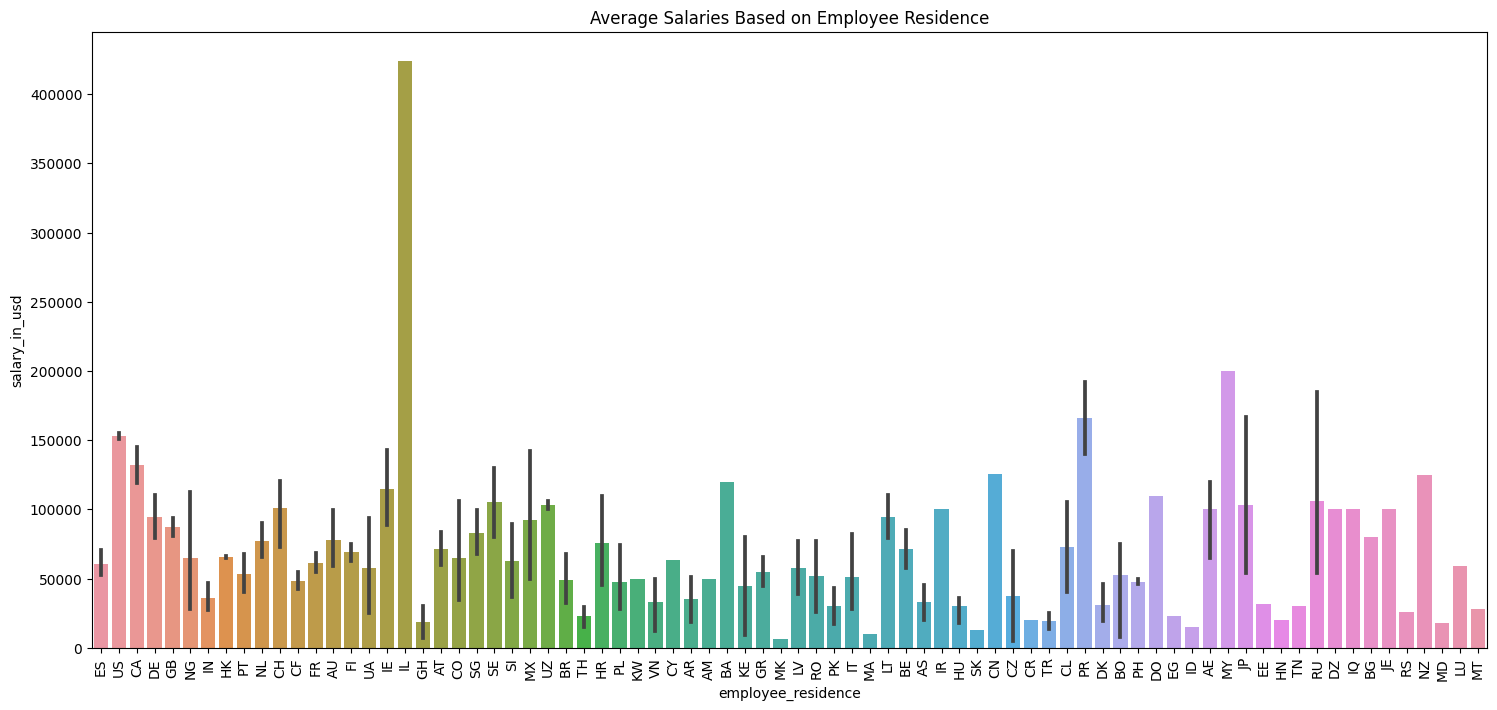

In [12]:
plt.figure(figsize=(18, 8))
snsplot = sns.barplot(df, x='employee_residence', y='salary_in_usd', estimator='mean')
snsplot.set_title('Average Salaries Based on Employee Residence')
snsplot.tick_params(axis='x', rotation=90)

Text(0.5, 1.0, 'Top 10 Highest Salary Jobs in 2023')

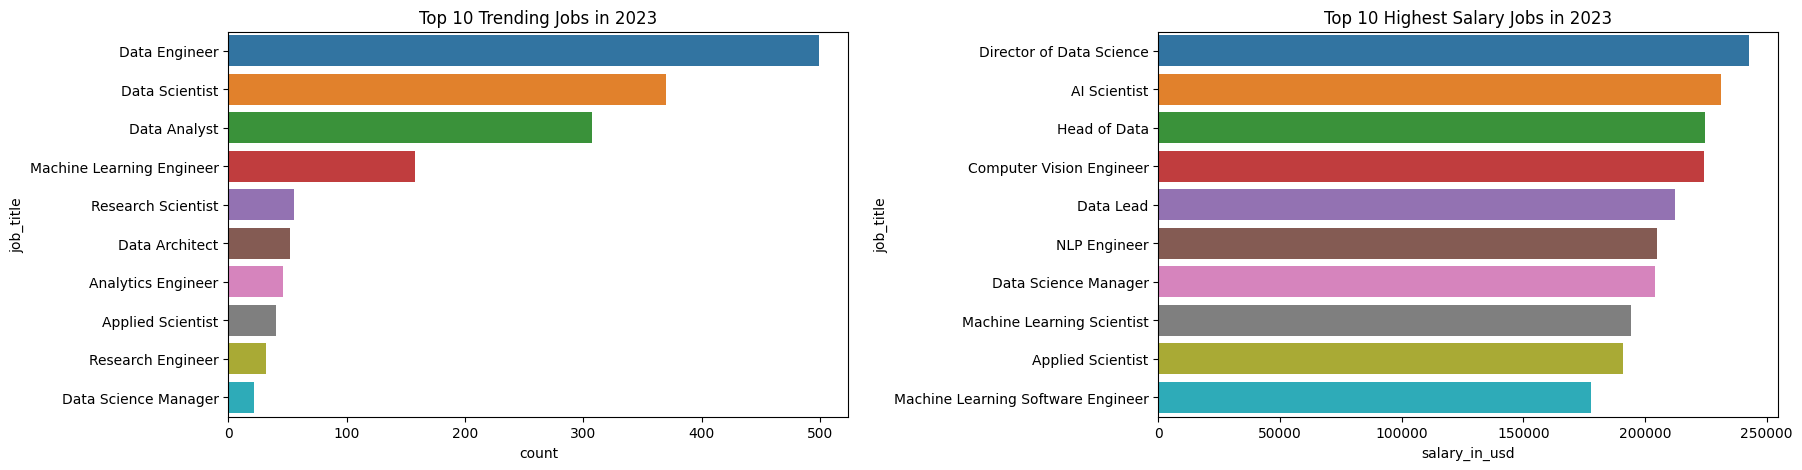

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5)

df_trend = df[df['work_year'] == 2023][['job_title']].value_counts().reset_index(name='count').iloc[:10]
df_salary = df[df['work_year'] == 2023].groupby('job_title', as_index=False).mean(numeric_only=True).sort_values('salary_in_usd', ascending=False).iloc[:10]

sns.barplot(df_trend, ax=axes[0], x='count', y='job_title').set_title('Top 10 Trending Jobs in 2023')
sns.barplot(df_salary, ax=axes[1], x='salary_in_usd', y='job_title').set_title('Top 10 Highest Salary Jobs in 2023')

Text(0.5, 1.0, 'Salaries Distribution Based on Company Size')

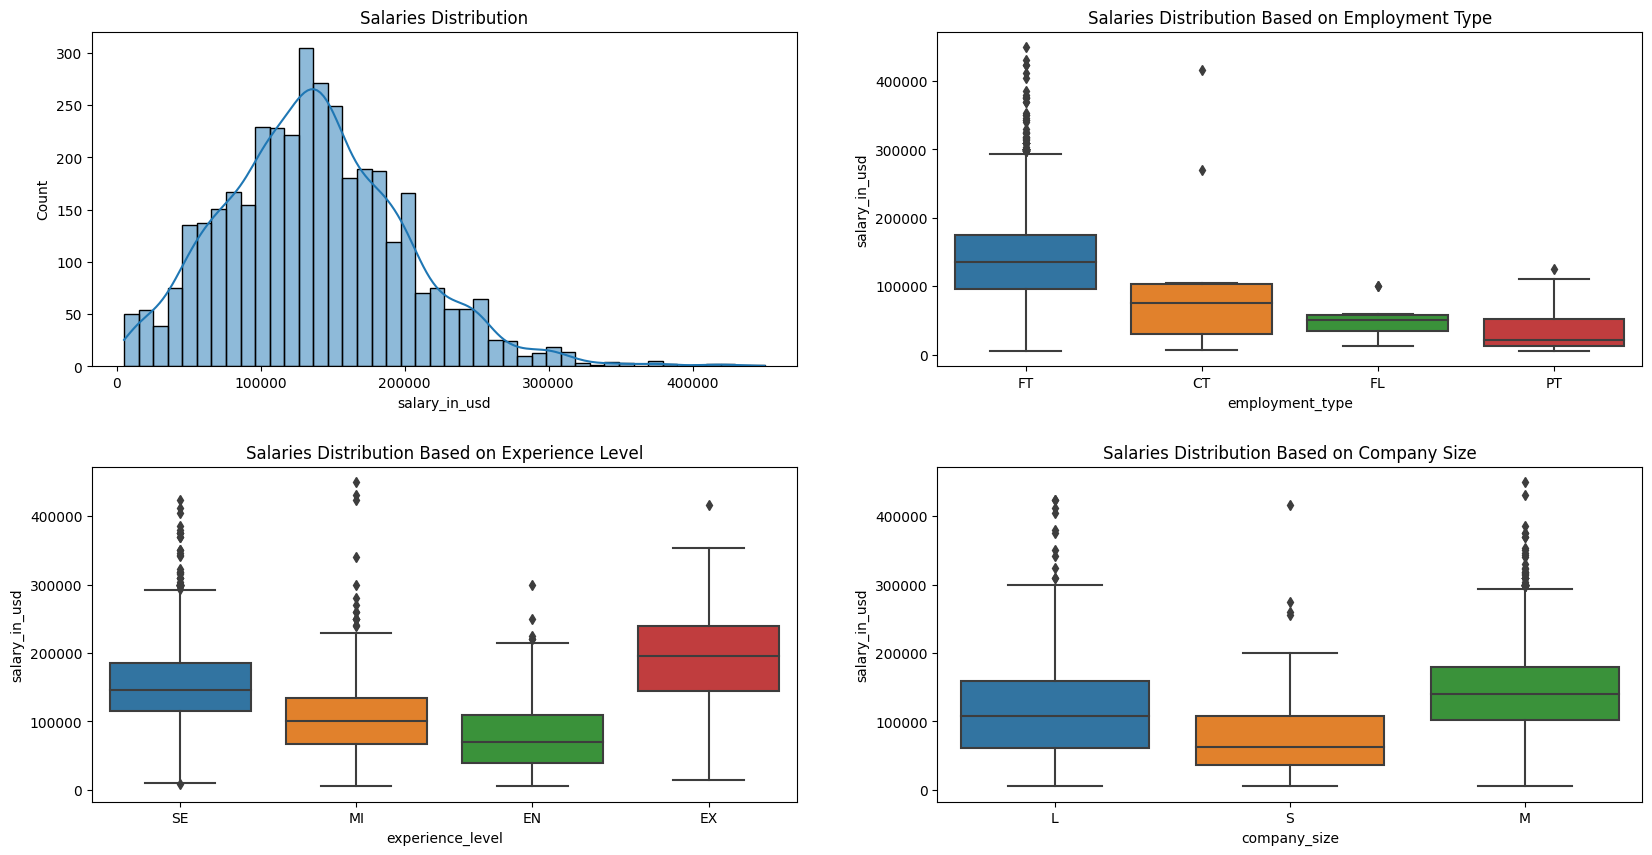

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3)

sns.histplot(df, ax=axes[0, 0], x='salary_in_usd', kde=True).set_title('Salaries Distribution')
sns.boxplot(df, ax=axes[0, 1], x='employment_type', y='salary_in_usd').set_title('Salaries Distribution Based on Employment Type')
sns.boxplot(df, ax=axes[1, 0], x='experience_level', y='salary_in_usd').set_title('Salaries Distribution Based on Experience Level')
sns.boxplot(df, ax=axes[1, 1], x='company_size', y='salary_in_usd').set_title('Salaries Distribution Based on Company Size')

Text(0.5, 1.0, 'Distribution of Salaries Based on Years with Hue for Different Employment Rate.')

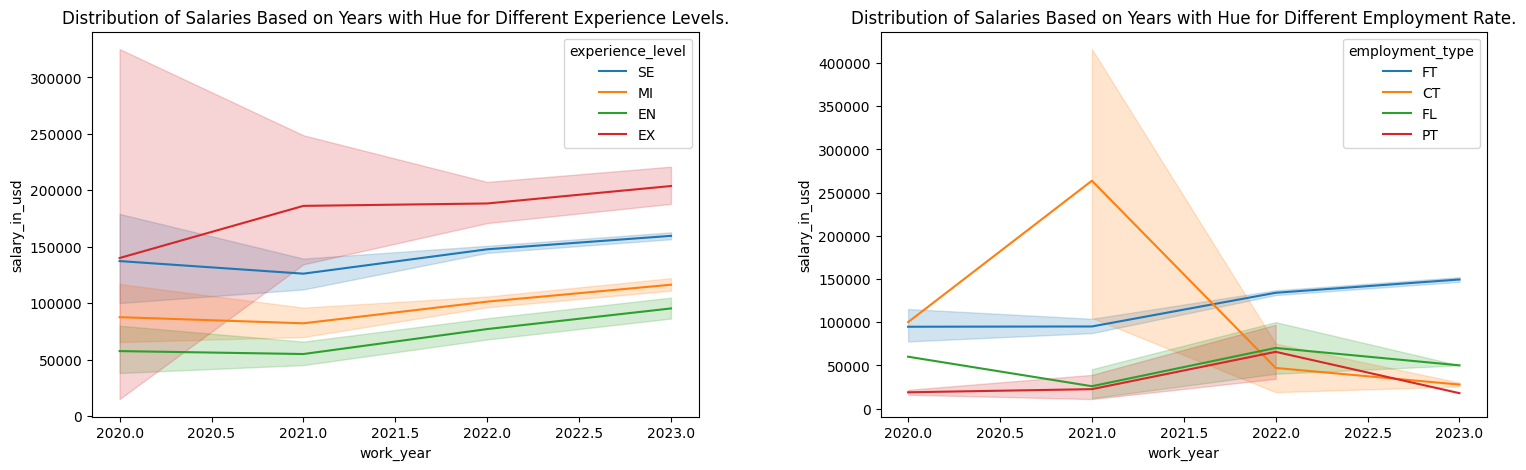

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)

sns.lineplot(df, ax=axes[0], x='work_year', y='salary_in_usd', hue='experience_level', estimator='mean').set_title('Distribution of Salaries Based on Years with Hue for Different Experience Levels.')
sns.lineplot(df, ax=axes[1], x='work_year', y='salary_in_usd', hue='employment_type', estimator='mean').set_title('Distribution of Salaries Based on Years with Hue for Different Employment Rate.')

Text(0.5, 1.0, 'Average Salaries Based on Experience Level and Employment Type')

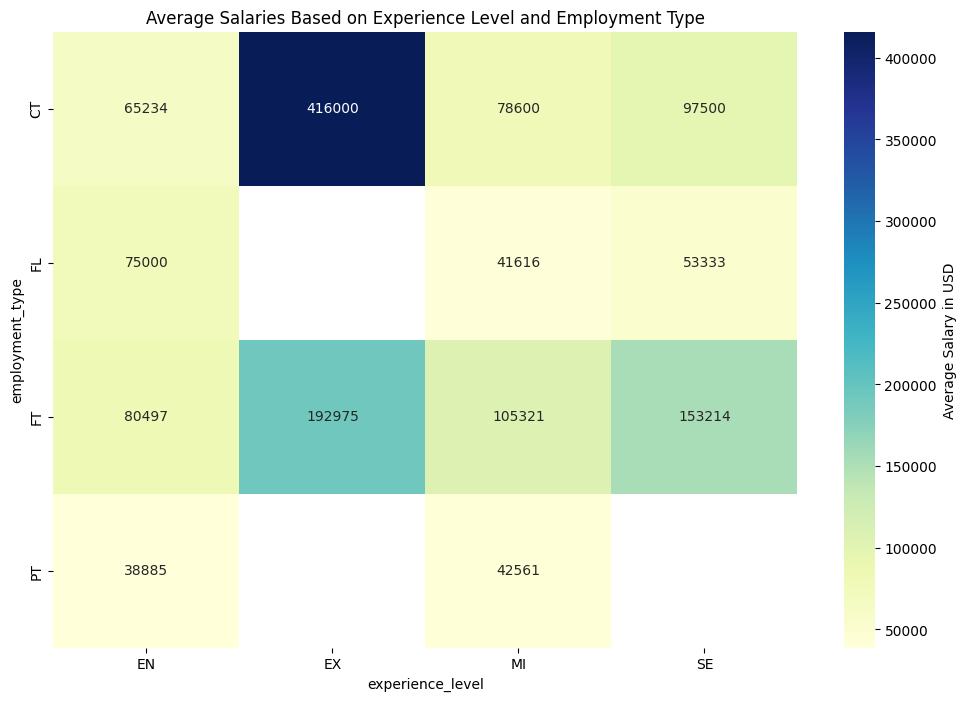

In [16]:
pivot = df.pivot_table(index='employment_type', columns='experience_level', values='salary_in_usd', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Average Salary in USD'}).set_title('Average Salaries Based on Experience Level and Employment Type')